In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load xls file
df = pd.read_excel("Datos trabajo 1.xls")


In [3]:
# 1. replace all missing values (999.99) with NA
df.replace(999.99, np.nan, inplace=True)

In [4]:
# 2. describe the data
df.describe()


,Grasas_sat,Alcohol,Calorías
count,172.000000,170.000000,173.000000
mean,24.774302,8.832000,1584.554913
std,6.533947,9.193883,305.080991
min,11.820000,0.000000,800.000000
25%,20.167500,1.780000,1400.000000
50%,24.130000,5.905000,1585.000000
75%,28.095000,12.965000,1761.000000
max,46.360000,40.110000,2376.000000


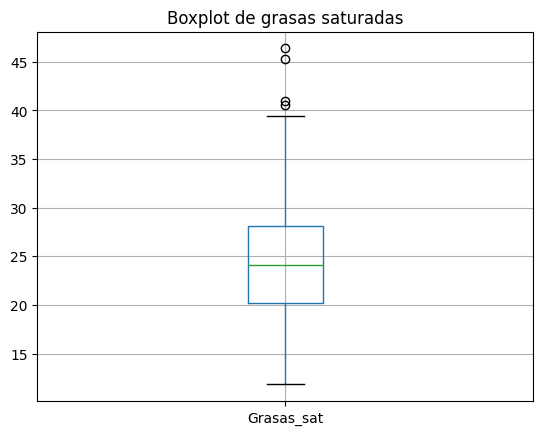

In [5]:
# 2. create grasas saturadas boxplot
df.boxplot(column="Grasas_sat")
plt.title("Boxplot de grasas saturadas")
plt.show()

En el boxplot se puede ver que que se cuenta con un rango relativamente grande que va desde 11 de mínima hasta los 46 de maxima. Por otra parte se puede observar que el 50% de los datos obtenidos estan en el rango de los 20 a 28 aproximadamente con la mediana en los 24. Por ultimo, podemos decir que los outliers para las grasas saturadas se concentran en los valores superiores para las grasas saturadas.

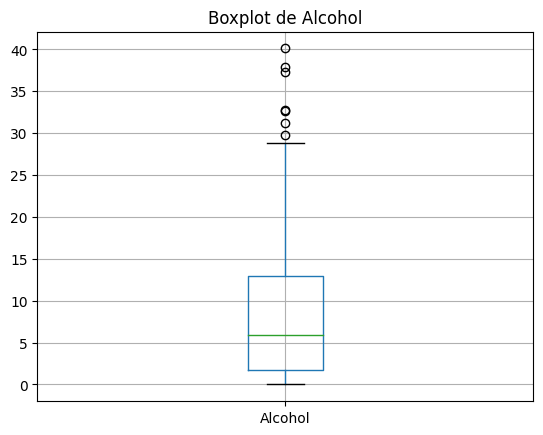

In [6]:
# 2. create Alcohol boxplot
df.boxplot(column="Alcohol")
plt.title("Boxplot de Alcohol")
plt.show()



En este gráfico se puede observar que si bien los datos tienen un rango moderado, la mayoría de los datos estan concentrados en los numeros mas bajos con la mediana cerca del 5. Por este motivo, podemos decir que la distribución de datos para el alcohol cuenta con una asimetría positiva en los datos obtenidos.

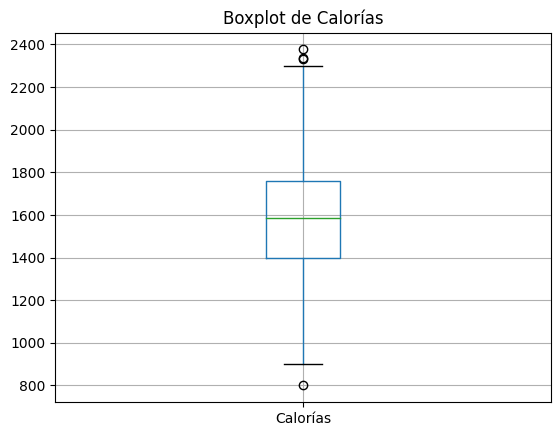

In [7]:
# 2. create calories boxplot
df.boxplot(column="Calorías")
plt.title("Boxplot de Calorías")
plt.show()

En este ultimo grafico, se puede ver que la distribución de los graficos es equilibrada ya que los datos entre el cuartíl 1 y 3 que contiene el 50% de los datos se puede ver centrado con respecto al rango de los datos con la mediana girando en torno a los 1600. A diferencia del graficos anteriores que concentraban los outliers en los valores del extremo superior, en este gráfico se puede observar que los outliers para las calorías se encuentran casi equilibrados entre ambos extremos.

In [8]:
# 3. Analyze the data according to the different sex
sex_grouped = df.groupby("Sexo")

# Describe the data
sex_grouped["Grasas_sat"].describe()


,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
F,95.0,24.585895,6.213704,11.82,20.295,23.98,28.295,41.01
M,77.0,25.006753,6.942932,12.71,20.060,24.61,27.920,46.36


In [9]:
sex_grouped["Alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
F,93.0,5.843548,5.754154,0.0,0.8,4.21,11.15,18.69
M,77.0,12.441429,11.124462,0.0,2.2,8.26,22.31,40.11


In [30]:
sex_grouped["Calorías"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
F,95.0,1537.242105,269.232863,800.0,1388.00,1568.0,1714.0,2013.0
M,78.0,1642.179487,336.587525,923.0,1434.75,1610.5,1804.5,2376.0


En base a los datos recolectados en las tablas podemos con concluir que los hombres ingieren mayor cantidad de alcohol, grasas saturadas y calorías que las mujeres en promedio. También podemos decir que en todos los atributos, el rango de los hombres es mayor que para las mujeres y su mediana esta mas desplazada hacia la derecha con respecto a las mujeres (hacia valores mas grandes).

In [10]:
# 4. Analyze the Alcohol variable according to the Calories categories
def categorize_calorias(calorias):
    if calorias <= 1100:
        return 'CATE 1'
    elif 1100 < calorias <= 1700:
        return 'CATE 2'
    else:
        return 'CATE 3'

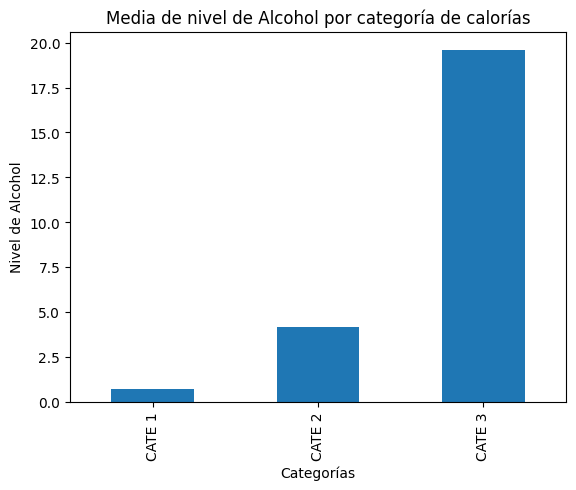

In [11]:
df['Calorias_Categoria'] = df['Calorías'].apply(categorize_calorias)
alcohol_calorias_grouped = df.groupby('Calorias_Categoria')['Alcohol'].mean()
alcohol_calorias_grouped.plot.bar()
plt.title('Media de nivel de Alcohol por categoría de calorías')
plt.xlabel('Categorías')
plt.ylabel('Nivel de Alcohol')
plt.show()

Se puede ver en el grafíco que la media del *nivel de alcohol* esta fuertemente relacionado con las *categorías de las calorías*.
La Cate3 que es la que más calorias consume es la que tiene mayor nivel de alcohol mientras que la Cate1 es el que menos consume de alcohol y es el que menos calorias tiene.